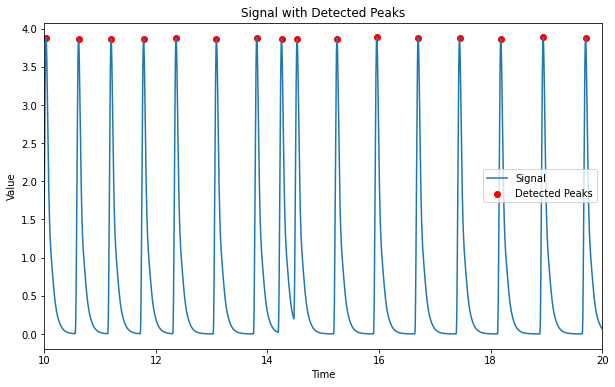

Estimated pulse rate: 81.64 beats per minute


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
df = pd.read_csv('PulseProcessed.csv')
# Column names for time and value
time_col = 'Time'
value_col = 'Value'
# Sampling rate of the signal
sampling_rate = 1000
# Remove the first 6 seconds of data (signal is noisy at the beginning)
df = df[df[time_col] >= 6]
# Find peaks using scipy.signal's find_peaks
peaks, _ = find_peaks(df[value_col], distance=10)
# Calculate total number of peaks and total time
total_peaks = len(peaks)
total_time = df[time_col].max() - df[time_col].min()
# Calculate pulse rate (beats per minute)
pulse_rate = total_peaks / total_time * 60
# Plot the signal with detected peaks
plt.figure(figsize=(10, 6))
plt.plot(df[time_col], df[value_col], label='Signal')
plt.scatter(df[time_col].iloc[peaks], df[value_col].iloc[peaks], color='red',
label='Detected Peaks')
plt.xlim(10, 20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signal with Detected Peaks')
plt.legend()
plt.savefig('Pulse3.png')
plt.show()
print(f"Estimated pulse rate: {pulse_rate:.2f} beats per minute")

[103.09278351 103.09278351 102.91595197 103.09278351 102.91595197
 103.09278351 102.91595197 102.91595197 103.09278351 103.09278351
  82.87292818  83.10249307 135.13513514 215.05376344  83.91608392
  84.15147265  80.97165992  80.86253369  81.08108108  79.0513834
  78.94736842  78.94736842  78.02340702  78.125       77.92207792
  78.02340702  77.92207792  78.02340702  78.02340702  77.92207792
  79.0513834   79.0513834   78.02340702  77.92207792  78.02340702
  77.92207792  78.02340702  78.125       77.92207792  78.02340702
  77.02182285  77.02182285  76.92307692  77.02182285  77.02182285
  77.02182285  76.92307692  77.02182285  76.04562738  75.94936709
  72.99270073  72.99270073  73.0816078   70.92198582  71.00591716
  70.01166861  70.01166861 198.67549669 110.49723757  71.00591716
  70.92198582  71.00591716  83.33333333  80.64516129 382.1656051
 740.74074074  70.01166861  70.01166861  70.01166861  70.01166861
  69.93006993  70.09345794  71.00591716  72.20216606  69.84866123
  71.9424460

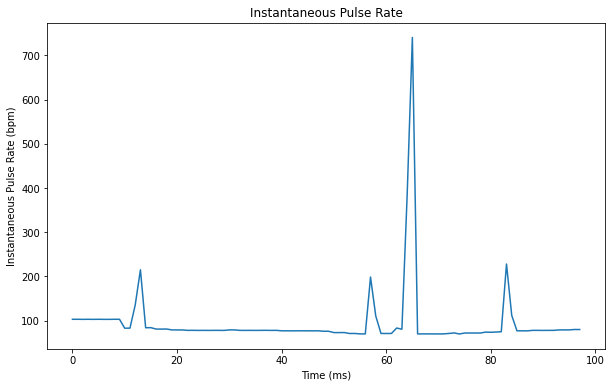

In [8]:
def calculate_instantaneous_pulse_rate(df, time_col, value_col):
    # Find peaks using scipy.signal's find_peaks
    peaks, _ = find_peaks(df[value_col])
    # Calculate time differences between peaks
    time_diff_ms = np.diff(peaks)
    # Calculate pulse rate (beats per minute)
    pulse_rates = 60 / (time_diff_ms/1000) # Convert time differences to seconds and then calculate bpm
    print(pulse_rates)
    # Plot the instantaneous pulse rate
    plt.figure(figsize=(10, 6))
    plt.plot(pulse_rates) # Omit the first peak for accurate rate calculation
    # plt.ylim(68, 200)
    plt.xlabel('Time (ms)')
    plt.ylabel('Instantaneous Pulse Rate (bpm)')
    plt.title('Instantaneous Pulse Rate')
    plt.savefig('Pulse5.png')
    plt.show()
# Calculate and plot instantaneous pulse rate
calculate_instantaneous_pulse_rate(df, 'Time', 'Value')